In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [27]:
n = 10000
x1 = np.random.randn(n) # "truth" model (data)
x2 = 0.8 * np.random.randn(n) + 1 # model 1
x3 = 0.5 * np.random.randn(n) - 1 # model 3 components
x4 = 0.7 * np.random.randn(n) - 3
x5 = 5.0 * np.random.rand(n) - 0.5 

x = np.arange(-6,6.01,0.01) # range for data
x_bincenters = np.arange(-6.005,6.01,0.01)


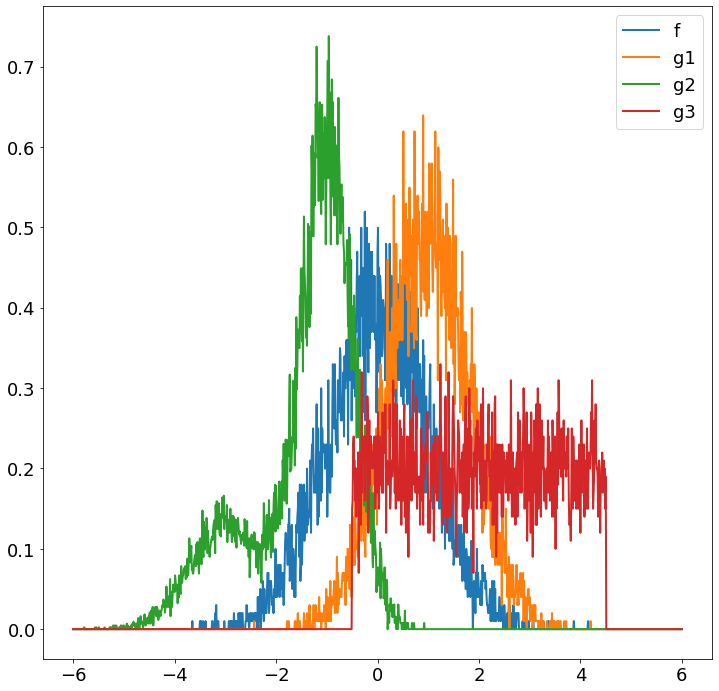

In [36]:
f = np.histogram(x1,bins=x_bincenters)[0] + 0.01 # generate PDFs
g1 = np.histogram(x2,bins=x_bincenters)[0] + 0.01
g2a = np.histogram(x3,bins=x_bincenters)[0]
g2b = np.histogram(x4,bins=x_bincenters)[0]
g2 = g2a + 0.3*g2b + 0.01
g3 = np.histogram(x5,bins=x_bincenters)[0] + 0.01

f = f/np.trapz(f,x) # normalize data
g1 = g1/np.trapz(g1,x)
g2 = g2/np.trapz(g2,x)
g3 = g3/np.trapz(g3,x)

plt.figure()
plt.plot(x,f,LineWidth=2,label='f')
plt.plot(x,g1,LineWidth=2,label='g1')
plt.plot(x,g2,LineWidth=2,label='g2')
plt.plot(x,g3,LineWidth=2,label='g3')
plt.legend()
plt.show()

In [32]:
# Compute integrand
Int1 = f * np.log(np.divide(f,g1))
Int2 = f * np.log(np.divide(f,g2))
Int3 = f * np.log(np.divide(f,g3))

# KL divergence
I1 = np.trapz(Int1,x)
I2 = np.trapz(Int2,x)
I3 = np.trapz(Int3,x)